# Statistical Metric and one class SVM anomaly detection.

# Statistical metric comparison

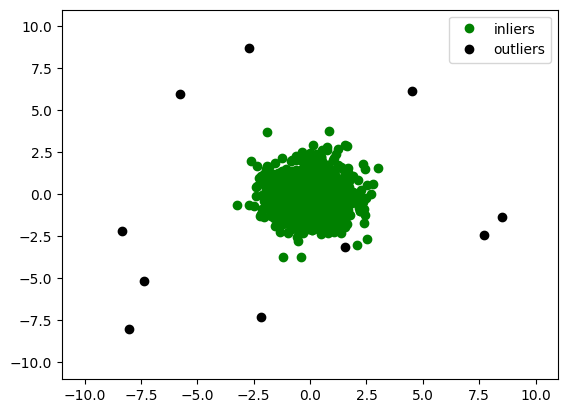

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

def generate_data(num_inliers, num_outliers, num_dimensions):
    # Generate the normally-distributed inliers
    inliers = np.random.randn(num_inliers, num_dimensions)

    # Add outliers sampled from a random uniform distribution
    outliers = np.random.uniform(low=-10, high=10, size=(num_outliers, num_dimensions))

    return np.vstack((inliers, outliers))

def plot_data(data, labels):
    inliers_mask = labels == 1
    outliers_mask = labels == -1

    inlier_plot = plt.plot(data[inliers_mask, 0], data[inliers_mask, 1], 'go', label='inliers')
    outlier_plot = plt.plot(data[outliers_mask, 0], data[outliers_mask, 1], 'ko', label='outliers')

    plt.xlim(-11, 11)
    plt.ylim(-11, 11)
    plt.legend(numpoints=1)
    plt.show()

num_dimensions = 2
num_samples = 1000
outlier_ratio = 0.01
num_inliers = int(num_samples * (1 - outlier_ratio))
num_outliers = num_samples - num_inliers

data = generate_data(num_inliers, num_outliers, num_dimensions)
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1

plot_data(data, labels)

Elliptic Envelope method for anomaly detection
This method involves fitting a multivariate Gaussian distribution to the data.

Applying sklearn.covariance.EllipticEnvelope

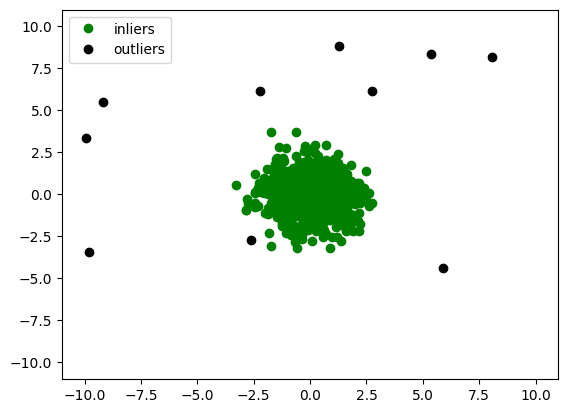

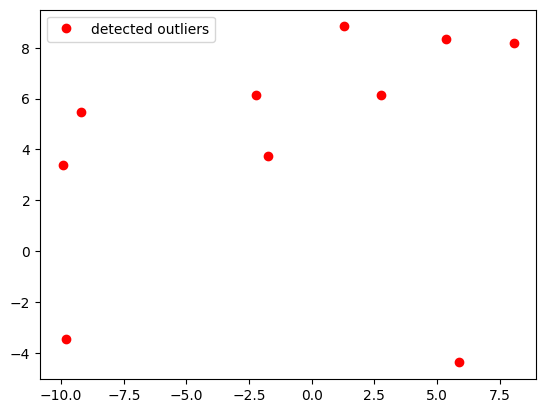

In [2]:
#Generate data and labels as you did previously
data = generate_data(num_inliers, num_outliers, num_dimensions)
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1

# Create an instance of EllipticEnvelope
envelope = EllipticEnvelope(contamination=outlier_ratio)

# Fit the envelope on your data
envelope.fit(data)

# Predict the labels (inliers vs outliers)
predicted_labels = envelope.predict(data)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope


# Plot the original data
plot_data(data, labels)

# Plot the anomalies detected by the envelope in red
outliers_mask = predicted_labels == -1
plt.plot(data[outliers_mask, 0], data[outliers_mask, 1], 'ro', label='detected outliers')
plt.legend(numpoints=1)
plt.show()


one class SVM

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
num_dimensions = 2
num_samples = 1000
outlier_ratio = 0.01
num_inliers = int(num_samples * (1-outlier_ratio))
num_outliers = num_samples - num_inliers
x_0 = np.random.randn(num_inliers//3, num_dimensions)
x_1 = np.random.randn(num_inliers//3, num_dimensions) - 7
x_2 = np.random.randn(num_inliers//3, num_dimensions) - 7
x_rand = np.random.uniform(low=-10, high=10, size=(num_outliers, num_dimensions))

# Add outliers sampled from a random uniform distribution
x = np.r_[x_0, x_1, x_2, x_rand]

# Generate labels, 1 for inliers and -1 for outliers
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1

Applying sklearn.svm.OneClassSVM

In [4]:
from sklearn import svm

classifier = svm.OneClassSVM(nu=0.99 * outlier_ratio + 0.01, kernel="rbf", gamma=0.1)
classifier.fit(x)
y_pred = classifier.predict(x)
num_errors = sum(y_pred != labels)
print('Number of errors: {}'.format(num_errors))

Number of errors: 13


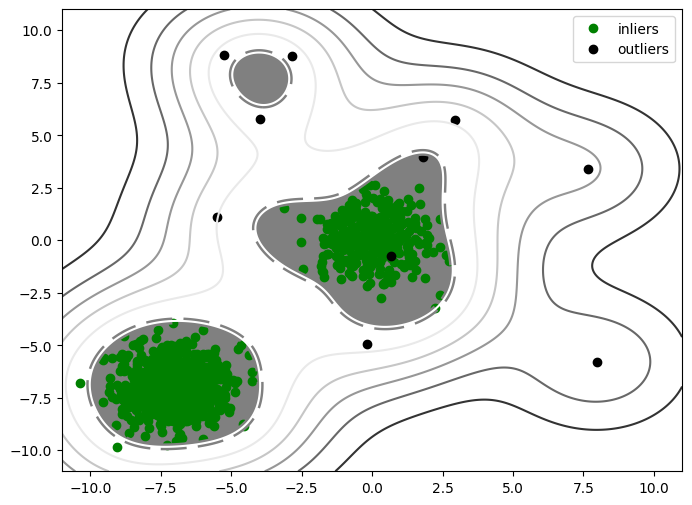

In [5]:
scores_pred = classifier.decision_function(x)
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_ratio)
xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')

plt.contour(xx, yy, Z, levels=[threshold],linewidths=5, colors='gray')
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Greys_r)
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='gray')

plt.xlim(-11,11)
plt.ylim(-11,11)
plt.legend(numpoints=1)
plt.show()

retrain the model on purely the inliers

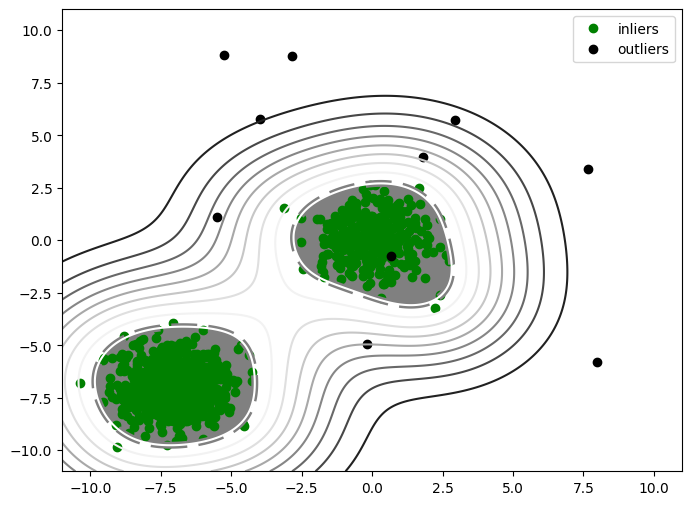

In [6]:
x = np.r_[x_0, x_1, x_2]
classifier = svm.OneClassSVM(nu=0.99 * outlier_ratio + 0.01, kernel="rbf", gamma=0.1)
classifier.fit(x)
scores_pred = classifier.decision_function(x)
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_ratio)
xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

x = np.r_[x, x_rand]

inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')

plt.contour(xx, yy, Z, levels=[threshold],linewidths=5, colors='gray')
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10), cmap=plt.cm.Greys_r)
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='gray')
plt.xlim(-11,11)
plt.ylim(-11,11)

plt.legend(numpoints=1)
plt.show()

## Density-based methods
these are wellsuited for high-dimensional datasets, which can be difficult to deal with using the other classes of anomaly detection methods.

Apply  Local Outlier Factor (LOF) to above dataset

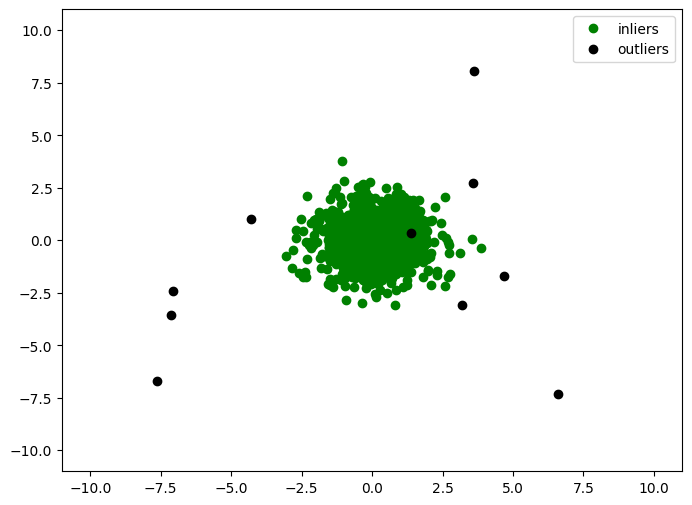

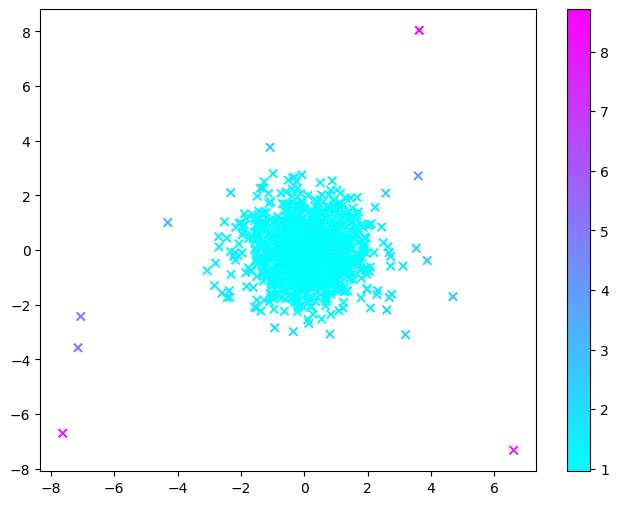

In [8]:
from sklearn.neighbors import LocalOutlierFactor

# Generate data and labels
data = generate_data(num_inliers, num_outliers, num_dimensions)
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1

# Create an instance of LocalOutlierFactor
lof = LocalOutlierFactor(contamination=outlier_ratio)

# Fit the LOF model on your data
lof.fit(data)

# Predict the anomaly scores (negative LOF scores)
anomaly_scores = -lof.negative_outlier_factor_

# Plot the original data
plot_data(data, labels)

# Plot anomalies detected by LOF in red based on anomaly scores
plt.scatter(data[:, 0], data[:, 1], c=anomaly_scores, cmap='cool', marker='x')
plt.colorbar()
plt.show()


Apply Gaussian Mixture Model (GMM)


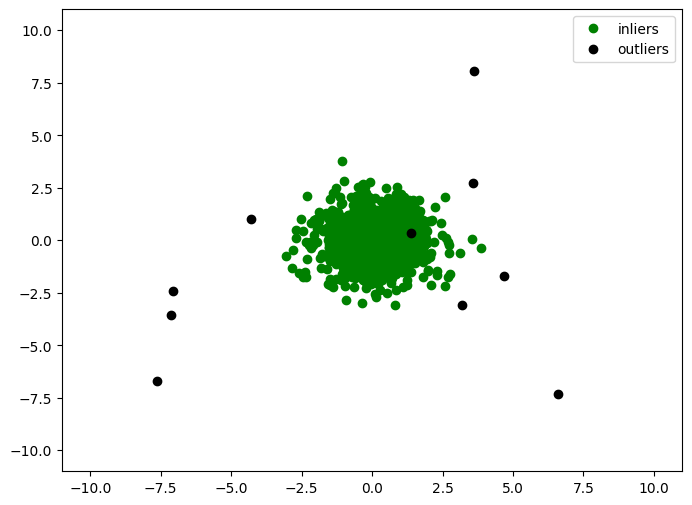

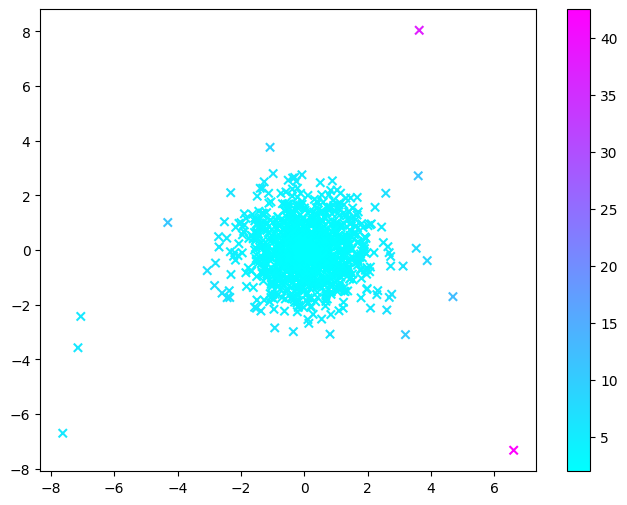

In [9]:

from sklearn.mixture import GaussianMixture

# Create an instance of GaussianMixture with the desired number of components
num_components = 2  # Adjust as needed
gmm = GaussianMixture(n_components=num_components)

# Fit the GMM model on your data
gmm.fit(data)

# Calculate the negative log-likelihood for each data point
log_likelihoods = -gmm.score_samples(data)

# Plot the original data
plot_data(data, labels)

# Plot anomalies detected by GMM in red based on negative log-likelihoods
plt.scatter(data[:, 0], data[:, 1], c=log_likelihoods, cmap='cool', marker='x')
plt.colorbar()
plt.show()

Kernel Density Estimation (KDE)

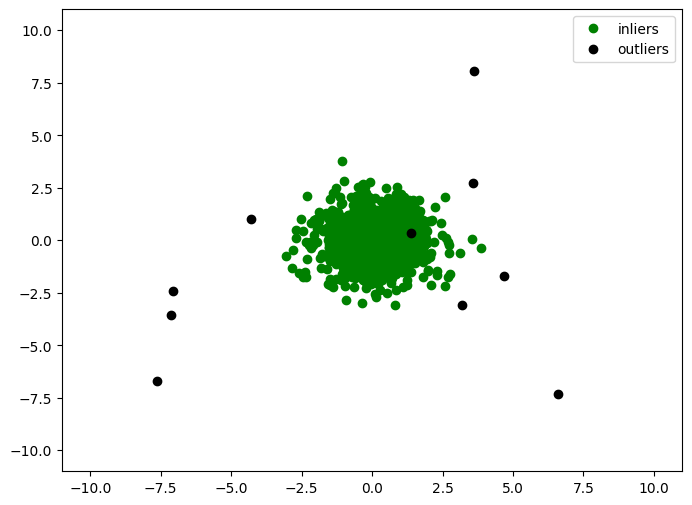

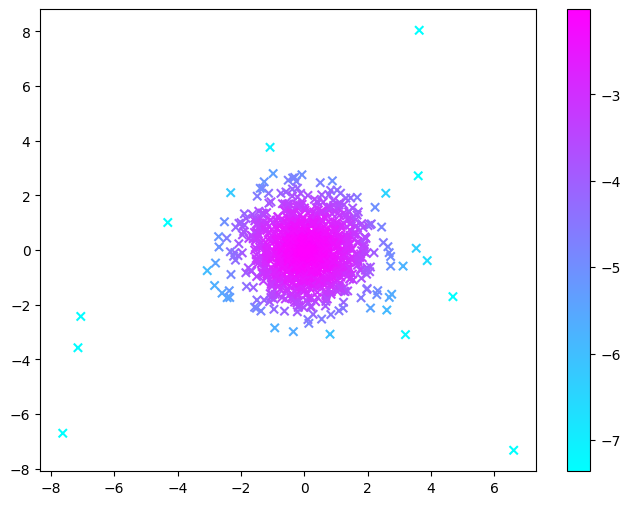

In [10]:
from sklearn.neighbors import KernelDensity

# Create an instance of KernelDensity with the desired bandwidth (adjust as needed)
bandwidth = 0.5
kde = KernelDensity(bandwidth=bandwidth)

# Fit the KDE model on your data
kde.fit(data)

# Calculate the log-densities for each data point
log_densities = kde.score_samples(data)

# Plot the original data
plot_data(data, labels)

# Plot anomalies detected by KDE in red based on log-densities
plt.scatter(data[:, 0], data[:, 1], c=log_densities, cmap='cool', marker='x')
plt.colorbar()
plt.show()



DBSCAN

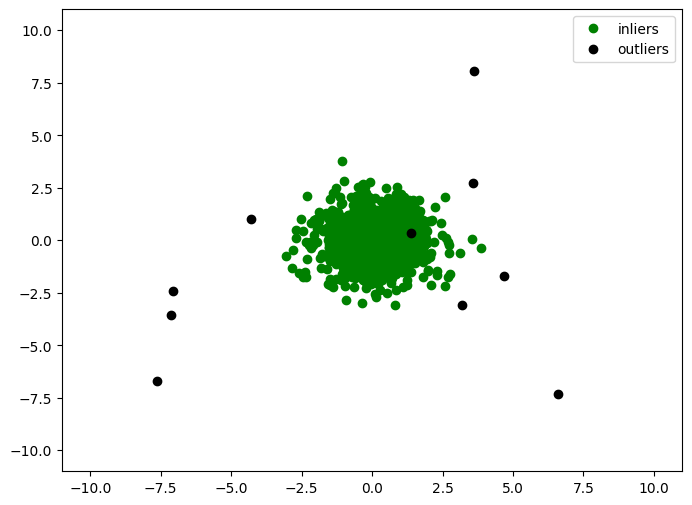

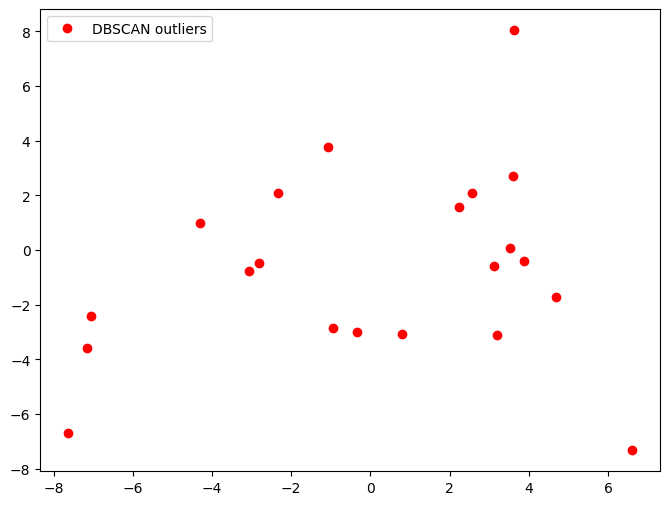

In [11]:
from sklearn.cluster import DBSCAN

# Create an instance of DBSCAN with the desired parameters
eps = 0.5  # The maximum distance between two samples to be considered as in the same neighborhood
min_samples = 5  # The number of samples in a neighborhood to consider a point as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model on your data
dbscan_labels = dbscan.fit_predict(data)

# Create an instance of DBSCAN with the desired parameters (adjust as needed)
eps = 0.5  # The maximum distance between two samples to be considered as in the same neighborhood
min_samples = 5  # The number of samples in a neighborhood to consider a point as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model on your data
dbscan_labels = dbscan.fit_predict(data)

# Plot the original data
plot_data(data, labels)

# Plot anomalies detected by DBSCAN in red
outliers_mask = dbscan_labels == -1
plt.plot(data[outliers_mask, 0], data[outliers_mask, 1], 'ro', label='DBSCAN outliers')
plt.legend(numpoints=1)
plt.show()

k-NN

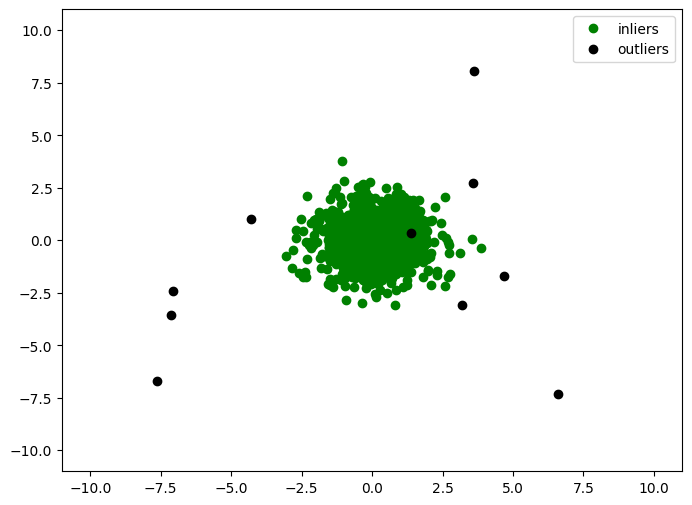

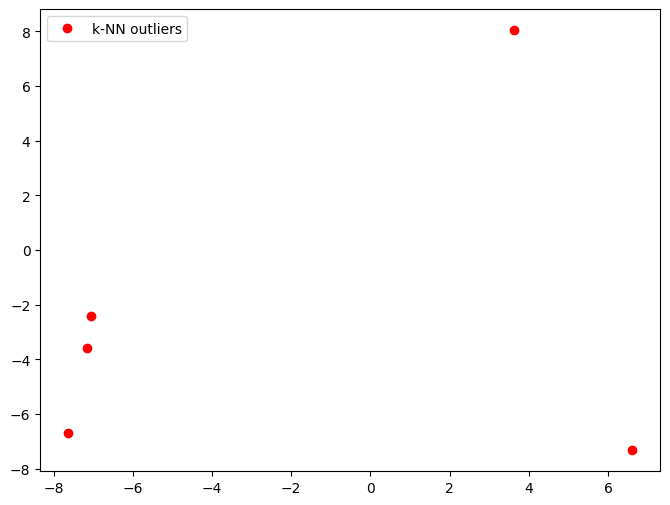

In [12]:
from sklearn.neighbors import NearestNeighbors

# Create an instance of NearestNeighbors with k neighbors
k = 5  # Adjust as needed
knn = NearestNeighbors(n_neighbors=k)

# Fit the k-NN model on your data
knn.fit(data)

# Calculate distances to k nearest neighbors for each data point
distances, _ = knn.kneighbors(data)

# Plot the original data
plot_data(data, labels)

# Set a threshold distance for anomaly detection
threshold_distance = 3.0  # Adjust as needed

# Identify outliers based on distances exceeding the threshold
outliers_mask = np.any(distances > threshold_distance, axis=1)
plt.plot(data[outliers_mask, 0], data[outliers_mask, 1], 'ro', label='k-NN outliers')
plt.legend(numpoints=1)
plt.show()
